In [85]:
"""
선형 회귀
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [86]:
"""
데이터 준비하기.
"""

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [87]:
"""
훈련용과 테스트용 데이터 준비.
"""

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)


In [88]:
"""
길이 50인 농어의 무게를 예측하기.
"""

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.predict([[50]]))

[1033.33333333]


test_length:  50 <class 'int'>
test_weight:  1033.3333333333333 <class 'float'>
distances:  [[6. 7. 7.]]
indexes : [[34  8 14]]


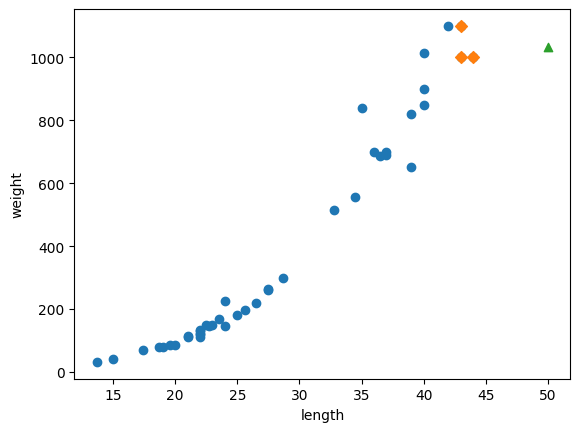

In [89]:
"""
kneighbors(): 가장 가까운 이웃까지의 거리와 이웃 샘플의 인덱스 얻기.
"""

test_length = 50
test_weight = float(knr.predict([[test_length]])[0])
print("test_length: ", test_length, type(test_length))
print("test_weight: ", test_weight, type(test_weight))
distances, indexes = knr.kneighbors([[50]])
# print("train_input: ", train_input)
# print("train_target: ", train_target)
print("distances: ", distances)
print("indexes :", indexes)

plt.scatter(train_input, train_target)
plt.xlabel("length")
plt.ylabel("weight")
plt.scatter(train_input[indexes], train_target[indexes], marker="D")  # 테스트 포인트(length:50) 에 가장 가까운 샘플 데이터 위에 D 마킹.
plt.scatter(test_length, test_weight, marker="^") # 테스트 포인트 (length:50, weight:1033.333)
plt.show()

In [90]:
train_target_indexes_mean = np.mean(train_target[indexes])
print("train_target_indexes_mean: ", train_target_indexes_mean)

train_target_indexes_mean:  1033.3333333333333


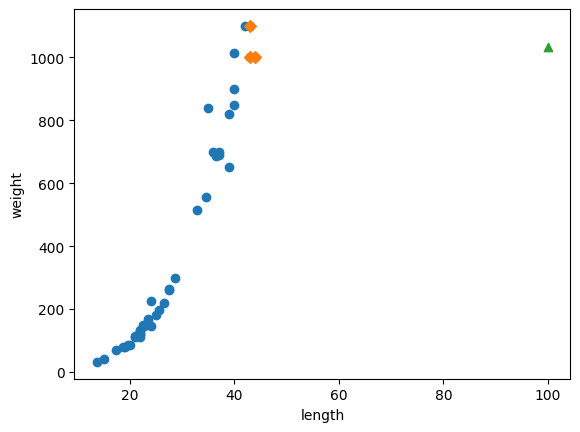

In [91]:
"""
더 멀리 있는 테스트 포인트(length)로 weight를 예측하여 오류를 명확하게 확인하기.
"""

test_length = 100
test_weight = float(knr.predict([[test_length]])[0])
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.xlabel("length")
plt.ylabel("weight")
plt.scatter(train_input[indexes], train_target[indexes], marker="D")  # 테스트 포인트(length:50) 에 가장 가까운 샘플 데이터 위에 D 마킹.
plt.scatter(test_length, test_weight, marker="^") # 테스트 포인트 (length:50, weight:1033.333)
plt.show()

lr.coef_ (A):  [39.01714496]
lr.intercept_ (B):  -709.0186449535474


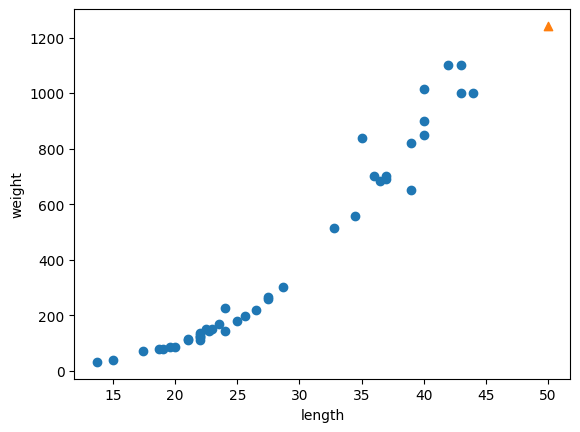

In [92]:
"""
선형회귀LinearRegression를 사용하여 특정 길이를 가진 농어의 무게를 추측하기.
"""

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print("lr.coef_ (A): ", lr.coef_) # 계수Coefficient, 가중치weight라고 불리움.
print("lr.intercept_ (B): ", lr.intercept_)

test_length = 50
test_weight = float(lr.predict([[test_length]])[0])
plt.scatter(train_input, train_target)
plt.xlabel("length")
plt.ylabel("weight")
plt.scatter(test_length, test_weight, marker="^") # 테스트 포인트 (length:50, weight:1033.333)
plt.show()

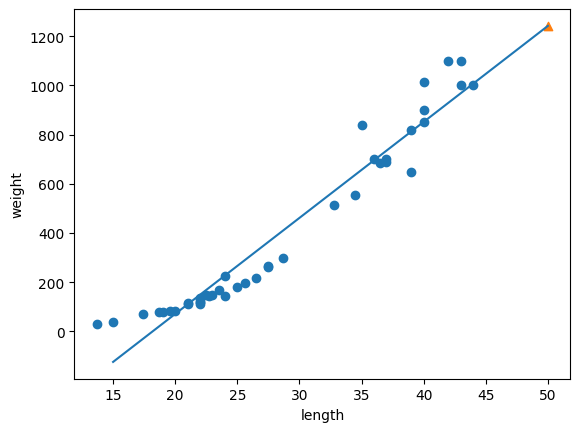

train_score:  0.9398463339976041
test_score:  0.824750312331356


In [93]:
"""선형회귀 훈련결과로 도출된 a(기욹기), b(절편) 형태를 그래프에 그림.
"""
A = lr.coef_
B = lr.intercept_
test_length = 50
test_weight = float(lr.predict([[test_length]])[0])

def f(x, a, b):
    return a*x+b

plt.plot([15, 50], [f(15,A,B), f(50,A,B)]) # 직선
plt.scatter(train_input, train_target)
plt.scatter(test_length, test_weight, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

print("train_score: " , lr.score(train_input, train_target))
print("test_score: ", lr.score(test_input, test_target))


train_input:  [[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]]
train_poly:  [[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]


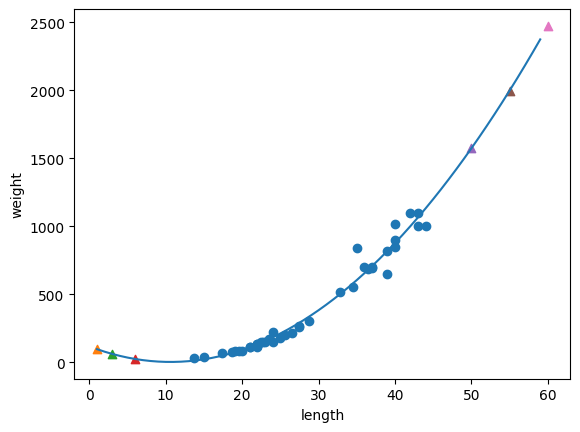

train_score:  0.9706807451768623
test_score:  0.9775935108325122
lr.coef_:  [  1.01433211 -21.55792498]
lr.intercept_:  116.0502107827827


In [104]:
"""
다항 회귀polynormal regression
"""

train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print("train_input: ", train_input[0:5])
print("train_poly: ", train_poly[0:5])

lr = LinearRegression()
lr.fit(train_poly, train_target)

# 데이터 포인트 그리기
plt.scatter(train_input, train_target)

# 테스트용 포인트 그리기
def scatter(x):
    plt.scatter(x, float(lr.predict([[x**2, x]])[0]), marker="^")
scatter(1)
scatter(3)
scatter(6)
scatter(50)
scatter(55)
scatter(60)
plt.xlabel("length")
plt.ylabel("weight")

# 다항그래프의 선 그리기
point = np.arange(1, 60)
plt.plot(point, (lr.coef_[0]*point**2) + (lr.coef_[1]*point) + lr.intercept_ )

plt.show()

print("train_score: " , lr.score(train_poly, train_target))
print("test_score: ", lr.score(test_poly, test_target))

print("lr.coef_: ", lr.coef_)
print("lr.intercept_: ", lr.intercept_)

